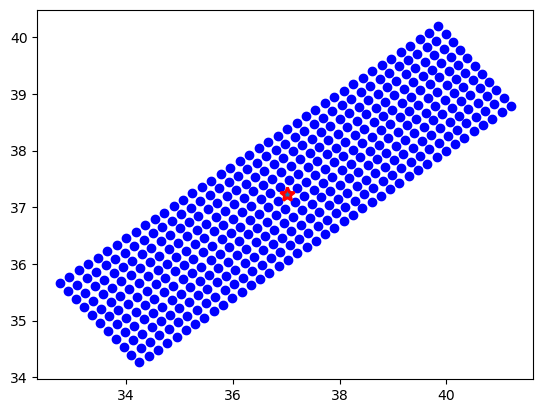

In [12]:
import numpy as np 
import matplotlib.pyplot as plt


slat=[] 
slong=[]

strike = 58
event_lat= 37.2251
event_long=37.0209
x_extend=40
y_extend=30

grid_size_km=10 #this is km spacing, each point will be placed these many kilometers away from the previous grid point
def strike_coords(strike, event_lat, event_long,extend):
    y_dist=extend * (np.cos(np.deg2rad(strike)))
    new_lat= event_lat + (y_dist/111.1)
    x_dist=extend * (np.sin(np.deg2rad(strike)))
   # denom=111.32
    denom = 111.32 * np.cos(np.deg2rad(event_lat))
    if np.abs(denom) < 1e-2:
        new_long = event_long  # No reliable longitude change, would result in unsuitable values
    else:
        new_long = event_long + (x_dist / denom)
    
    return new_lat, new_long
def eqspaced_points_list(strike, event_lat, event_long, extend, grid_size):
    lat_long_list=[]
    spacing=np.arange(grid_size,extend+grid_size, grid_size)
    
    for i in spacing:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, -i))
    lat_long_list.append(strike_coords(strike, event_lat, event_long, 0))
    for j in spacing:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, j))
    
    return lat_long_list


def make_source_grid_along_strike(strike, event_lat, event_long, x_extend, y_extend, grid_size_km_spacing):

    '''The main differences in this function from the previous make_source_grid_hetero are
    1)This function orients the source grid along the strike direction
    2)This function has its x and y extends in Kms, rather than in degrees. although 
    there can be a 
    3)The grid points are placed in equivalent extends, which are given in kilometers. 
    modification made so that we can input in degrees rather than in kilometers
    '''
    
    grid_list=[]
    temp=[]
    strike_perpendicular = (strike + 90) % 360
    strike_perpendicular_list=eqspaced_points_list(strike_perpendicular, event_lat, event_long, y_extend, grid_size_km_spacing)
    
    for i in strike_perpendicular_list:
        temp=eqspaced_points_list(strike, i[0], i[1], x_extend, grid_size_km_spacing)
        grid_list.append(temp)
        temp=[]
    
    
    #for i in strike_perpendicular_list:
    #   temp=strike_coords_list(strike, i[0], i[1], x_extend, grid_size_km_spacing)
    #    grid_list.append(temp)
    #    temp=[]
    slat=[]
    slong=[]
    slat = [coord[0] for row in grid_list for coord in row]
    slong= [coord[1] for row in grid_list for coord in row]
    return slong, slat

slong, slat= make_source_grid_along_strike(51,event_lat, event_long, 400, 100, 20)
plt.scatter(slong, slat, color='b')
plt.plot(event_long, event_lat, marker='*',markersize=10,markeredgecolor='red',markeredgewidth=2)

# modifications to reach row major ordering

1071
number of points along strike 51.0
number of points perpendicular to strike 21.0


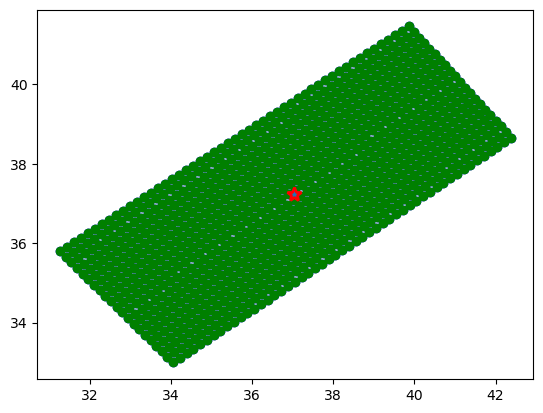

In [82]:
import numpy as np 
import matplotlib.pyplot as plt


slat=[] 
slong=[]

strike = 51
event_lat= 37.2251
event_long=37.0209
x_extend=40
y_extend=30

grid_size_km=10 #this is km spacing, each point will be placed these many kilometers away from the previous grid point
def strike_coords(strike, event_lat, event_long,extend):
    y_dist=extend * (np.cos(np.deg2rad(strike)))
    new_lat= event_lat + (y_dist/111.1)
    x_dist=extend * (np.sin(np.deg2rad(strike)))
   # denom=111.32
    denom = 111.32 * np.cos(np.deg2rad(event_lat))
    if np.abs(denom) < 1e-2:
        new_long = event_long  # No reliable longitude change, would result in unsuitable values
    else:
        new_long = event_long + (x_dist / denom)
    
    return new_lat, new_long

def eqspaced_points_list(strike, event_lat, event_long, extend, grid_size):
    lat_long_list=[]
    spacing=np.arange(grid_size,extend+grid_size, grid_size)
    
    #for i in spacing:
     #   lat_long_list.append(strike_coords(strike, event_lat, event_long, -i))
    lat_long_list.append(strike_coords(strike, event_lat, event_long, 0))
    for j in spacing:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, j))
    
    return lat_long_list

def make_source_grid_along_strike_mod(strike, event_lat, event_long, x_extend, y_extend, grid_size_km_spacing):

    '''The main differences in this function from the previous make_source_grid_hetero are
    1)This function orients the source grid along the strike direction
    2)This function has its x and y extends in Kms, rather than in degrees. although 
    there can be a 
    3)The grid points are placed in equivalent extends, which are given in kilometers. 
    modification made so that we can input in degrees rather than in kilometers
    '''
    
    grid_list=[]
    temp=[]
    slat=[]
    slong=[]
    strike_perpendicular = (strike + 90) % 360
    a_lat, a_long=strike_coords(strike, event_lat, event_long, -x_extend)
    target_lat, target_long=strike_coords(strike_perpendicular, a_lat, a_long, -y_extend)
    starting_point=[target_lat, target_long]
    strike_perpendicular_list=eqspaced_points_list(strike_perpendicular, starting_point[0], starting_point[1], 2*y_extend, grid_size_km_spacing)
    for i in strike_perpendicular_list:
        temp=eqspaced_points_list(strike, i[0], i[1], 2*x_extend, grid_size_km_spacing)
        grid_list.append(temp)
        temp=[]
    
    slat = [coord[0] for row in grid_list for coord in row]
    slong= [coord[1] for row in grid_list for coord in row]
    return slong, slat


slong, slat = make_source_grid_along_strike_mod(51,event_lat, event_long, 500, 200, 20)

plt.scatter(slong, slat, color='b')
plt.plot(event_long, event_lat, marker='*',markersize=10,markeredgecolor='red',markeredgewidth=2)
end=1071

plt.scatter(slong[0:end],slat[0:end],color='g')
print(len(slat))
print("number of points along strike",(1+((2*500)/20)))
print("number of points perpendicular to strike",(1+((2*200)/20)))


#plt.plot(target_long, target_lat, marker='*',markersize=10,markeredgecolor='red',markeredgewidth=2)
#this is at row major ordering, perfect row major ordering, it is although slightly offset from the actual event_longitude, that can be brought closer 
#using better approximations of latitude

number of grid points =  63
grid size is approximately 317.59219670128914


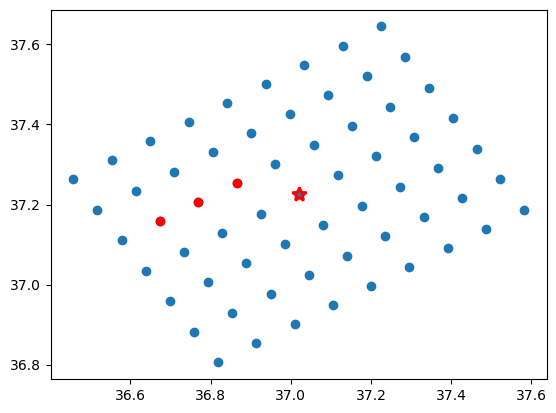

[36.86534675658463, 36.7695766769041, 36.67380659722357, 36.57803651754304, 36.961116836265155, 37.05688691594568, 37.15265699562621, 37.24842707530674, 37.34419715498727, 36.80546620705859, 36.70959874158687, 36.613731276115146, 36.51786381064342, 36.90133367253032, 36.99720113800205, 37.09306860347377, 37.188936068945495, 37.28480353441722, 36.74558528877388, 36.64962006875229, 36.553654848730694, 36.457689628709105, 36.84155050879548, 36.937515728817075, 37.033480948838665, 37.12944616886026, 37.22541138888185, 36.92522693881982, 36.82955387763964, 36.73388081645946, 36.63820775527928, 37.0209, 37.116573061180176, 37.212246122360355, 37.307919183540534, 37.40359224472071, 36.98510675522314, 36.889530346711446, 36.79395393819975, 36.69837752968805, 37.08068316373484, 37.176259572246536, 37.27183598075823, 37.36741238926993, 37.46298879778163, 37.04498620724478, 36.949506087019884, 36.85402596679499, 36.7585458465701, 37.140466327469674, 37.235946447694566, 37.331426567919465, 37.4269

In [2]:
slong, slat = make_source_grid_along_strike(strike, event_lat, event_long, x_extend, y_extend, grid_size_km)
print("number of grid points = ", len(slong))
gridlen=111.1*(slat[1]-slong[0])/(np.cos(strike))
print("grid size is approximately", gridlen)
end=3
plt.scatter(slong, slat)
plt.scatter(slong[0:end],slat[0:end],color='r')
plt.plot(event_long, event_lat, marker='*',markersize=10,markeredgecolor='red',markeredgewidth=2)
plt.show()

#signal preparation
print(slong)
end = slong[len(slong)-1]
print(end)

 #random numbers in the range 1 to 10
    
#basically now what we gathered is that the grids are messed up, to put a signal a lot of effort has to go in 
'''
Tomorrow at lab - 
1)Just perform the code as sir has sent you, use that. keep it as back up if he comes to check 
before you have figured out a way to do the indexing well. 

2)Implement- 
one idea for good grid point indexing is that, look at the first grid point you are defining. 
try to bring that in one of the corners. so the grid are more organized actually bring it to 
the top right corner. that's direction is preffered by the current code for the first indexing

'''
print("\n")
